## PLANT DISEASE CLASSIFICATION

This dataset is created using offline augmentation from the original dataset. The original PlantVillage Dataset can be found [here](https://github.com/spMohanty/PlantVillage-Dataset).This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. A new directory containing 33 test images is created later for prediction purpose.

### Objective
We need to build a model, which can classify between healthy and diseased crop leaves and also if the crop have any disease, predict which disease is it.

### Import Libraries 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers

### Loading train and test set

In [2]:
train = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
test = '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [3]:
# load train and test dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train, image_size=(256, 256), batch_size=100, seed=42)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test, image_size=(256, 256), batch_size=100, seed=42)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


### Numbers of Classes

In [4]:
num_classes = train_ds.class_names
num_classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

### CNN Model

In [5]:
#CNN
model = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(len(num_classes), activation = 'softmax')
])

In [6]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
cnn_model = model.fit(train_ds, validation_data=test_ds, epochs=5)

Epoch 1/5
703/703 [==============================] - 644s 899ms/step - loss: 1.7165 - accuracy: 0.5715 - val_loss: 0.4367 - val_accuracy: 0.8638
Epoch 2/5
703/703 [==============================] - 295s 417ms/step - loss: 0.3111 - accuracy: 0.9027 - val_loss: 0.2848 - val_accuracy: 0.9118
Epoch 3/5
703/703 [==============================] - 252s 356ms/step - loss: 0.1532 - accuracy: 0.9501 - val_loss: 0.2825 - val_accuracy: 0.9176
Epoch 4/5
703/703 [==============================] - 251s 355ms/step - loss: 0.0864 - accuracy: 0.9729 - val_loss: 0.2668 - val_accuracy: 0.9278
Epoch 5/5
703/703 [==============================] - 249s 353ms/step - loss: 0.0723 - accuracy: 0.9766 - val_loss: 0.2939 - val_accuracy: 0.9236


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 256, 256, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0

### Plotting 

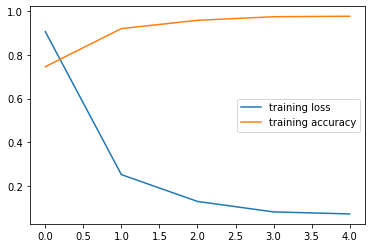

In [11]:
plt.plot(cnn_model.history['loss'], label='training loss')
plt.plot(cnn_model.history['accuracy'], label='training accuracy')
plt.legend()
plt.show()

### Prediction

In [12]:
disease_classes = ['Apple___Apple_scab',
                   'Apple___Black_rot',
                   'Apple___Cedar_apple_rust',
                   'Apple___healthy',
                   'Blueberry___healthy',
                   'Cherry_(including_sour)___Powdery_mildew',
                   'Cherry_(including_sour)___healthy',
                   'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                   'Corn_(maize)___Common_rust_',
                   'Corn_(maize)___Northern_Leaf_Blight',
                   'Corn_(maize)___healthy',
                   'Grape___Black_rot',
                   'Grape___Esca_(Black_Measles)',
                   'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                   'Grape___healthy',
                   'Orange___Haunglongbing_(Citrus_greening)',
                   'Peach___Bacterial_spot',
                   'Peach___healthy',
                   'Pepper,_bell___Bacterial_spot',
                   'Pepper,_bell___healthy',
                   'Potato___Early_blight',
                   'Potato___Late_blight',
                   'Potato___healthy',
                   'Raspberry___healthy',
                   'Soybean___healthy',
                   'Squash___Powdery_mildew',
                   'Strawberry___Leaf_scorch',
                   'Strawberry___healthy',
                   'Tomato___Bacterial_spot',
                   'Tomato___Early_blight',
                   'Tomato___Late_blight',
                   'Tomato___Leaf_Mold',
                   'Tomato___Septoria_leaf_spot',
                   'Tomato___Spider_mites Two-spotted_spider_mite',
                   'Tomato___Target_Spot',
                   'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
                   'Tomato___Tomato_mosaic_virus',
                   'Tomato___healthy']

In [13]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight2.JPG"
img = image.load_img(image_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)                    
img_tensor = np.expand_dims(img_tensor, axis=0)    
pred = model.predict_classes(img_tensor)
disease_classes[pred[0]]

'Potato___Early_blight'

In [14]:
for images, labels in test_ds.take(1):
    prediction = model.predict(images)
    for predict in prediction:
        lab = num_classes[np.argmax(predict)]
        final_pred = np.argmax(predict)

In [15]:
final_pred

14

In [16]:
lab

'Grape___healthy'

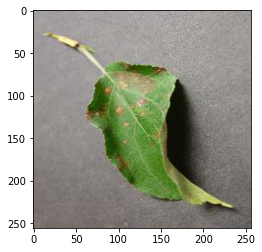

In [17]:
plt.imshow(plt.imread("../input/new-plant-diseases-dataset/test/test/AppleCedarRust3.JPG"))
plt.show()

#### HDF5 file 

In [21]:
model.save('my_model.h5') 

#### Save Model in JSON Format

In [18]:
from keras.models import model_from_json

# serialize model to json
json_model = model.to_json()

#save the model architecture to JSON file
with open('Cnn_model.json', 'w') as json_file:
    json_file.write(json_model)
    
#saving the weights of the model
model.save_weights('Cnn_weights.h5')

#### Load model using json

In [19]:
json_file = open('Cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Cnn_weights.h5")
print("Loaded model from disk")
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk


#### Prediction

In [20]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy/023810b0-18e6-4352-9dfa-c2f4c034cda5___RS_HL 7538.JPG"
img = image.load_img(image_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)                    
img_tensor = np.expand_dims(img_tensor, axis=0)    
pred = loaded_model.predict_classes(img_tensor)
disease_classes[pred[0]]

'Apple___healthy'